In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
from PIL import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
import cv2 as cv

In [4]:
train_path = 'datasets/Annotated Images/Train'
test_path = 'datasets/Annotated Images/Test'

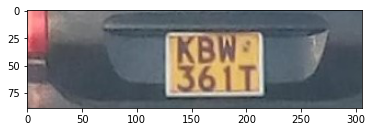

In [5]:
#display image of a license plate
image = Image.open('datasets/Annotated Images/Train/plate_number/plate_2.jpeg')
plt.imshow(np.array(image))

In [6]:
datagen = ImageDataGenerator()

In [7]:
datagen_flow = datagen.flow_from_directory(
    # the folder with the dataset
    train_path,
    # the target image size
    target_size=(256, 256), 
    # the batch size
    #batch_size=3,
    # class mode
    class_mode=None,
    # set a random number generator
    seed=0)

Found 17 images belonging to 1 classes.


In [8]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=3)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=1, 
                                     shuffle=False)

Found 17 images belonging to 1 classes.
Found 5 images belonging to 1 classes.


In [28]:
plate_cascade = cv.CascadeClassifier('ai-indian-license-plate-recognition-data/')

In [27]:
plate_cascade.detectMultiScale?

In [29]:
def detect_plate(img): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 7) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :] # extracting the Region of Interest of license plate for blurring.
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2,y), (x+w-10, y+h-5), (51,181,155), 3) # finally representing the detected contours by drawing rectangles around the edges.
    return plate_img, plate # returning the processed image.

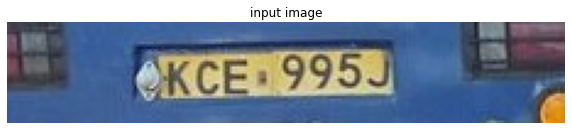

In [25]:
def display(img_, title=''):
    img = cv.cvtColor(img_, cv.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

img = cv.imread('datasets/Annotated Images/Train/plate_number/plate_6.jpeg')
display(img, 'input image')

In [30]:
# Getting plate prom the processed image
output_img, plate = detect_plate(img)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [11]:
import glob

In [13]:
files = glob.glob(train_path)

In [10]:
IMAGE_SIZE = 224

In [14]:
X = []

In [17]:
for f1 in files:
    img = cv.imread(f1)
    #img = cv.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

In [18]:
X

[array(None, dtype=object)]

In [19]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
resizeannotation('datasets/Annotated Images/Train/plate_number/plate_2.jpeg')